# GREMLIN ML Notebook

Short notebook covering shallow ML on an amospheric dataset.

TODO: Dataset pre-procesing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from watermark import watermark

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from gremlin_utils import rmse_results, result_plot

In [3]:
# ML specific imports
import xgboost as XGB

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [4]:
print(watermark(packages="numpy,pandas,xgboost,sklearn"))

numpy  : 1.21.5
pandas : 1.4.3
xgboost: 1.7.3
sklearn: 1.2.1



In [5]:
df_rnd_train = pd.read_parquet('../datasets/df_rnd_train.parquet')
df_rnd_test = pd.read_parquet('../datasets/df_rnd_test.parquet')
df_rnd_val = pd.read_parquet('../datasets/df_rnd_val.parquet')

.describe() is a great way to get some quick stats from a dataframe. Play around with using .T, and you can even use your own percentiles, etc.

In [6]:
df_rnd_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ABI_C07,34009982.0,236.116104,25.268618,197.305283,246.216003,253.874084,263.684479,325.676056
ABI_C09,34009982.0,126.986687,90.099007,185.792755,213.269455,221.834610,234.470901,262.657745
ABI_C13,34009982.0,165.365356,64.693771,185.727448,214.460480,224.774948,244.643906,312.439301
GLM,34009982.0,0.885902,4.329247,0.000000,0.000000,0.000000,0.074074,703.259277
MRMS_REFC,34009982.0,17.686193,10.606426,-11.000000,12.055555,18.333334,26.583334,72.666664


In [7]:
df_rnd_val.describe().T

,count,mean,std,min,25%,50%,75%,max
ABI_C07,2119923.0,251.188263,22.208483,197.305283,237.634079,252.106537,261.452454,348.350525
ABI_C09,2119923.0,225.201645,12.354171,188.565384,214.407700,223.677811,233.587677,262.939972
ABI_C13,2119923.0,232.254089,20.479204,187.566849,215.867630,226.786789,243.234695,307.146210
GLM,2119923.0,0.893222,4.281476,0.000000,0.000000,0.000000,0.037037,263.148132
MRMS_REFC,2119923.0,19.838957,10.761814,-9.000000,12.000000,18.416666,26.722221,69.000000


Any trends/differences that are worrying? Any variables that might be more useful than others?

### Dataset plotting

Explore the datasets, play with different dataframes, and head vs tail. Plotting the entire dataset is not feasible due to time. Good lesson when looking at larger datasets.

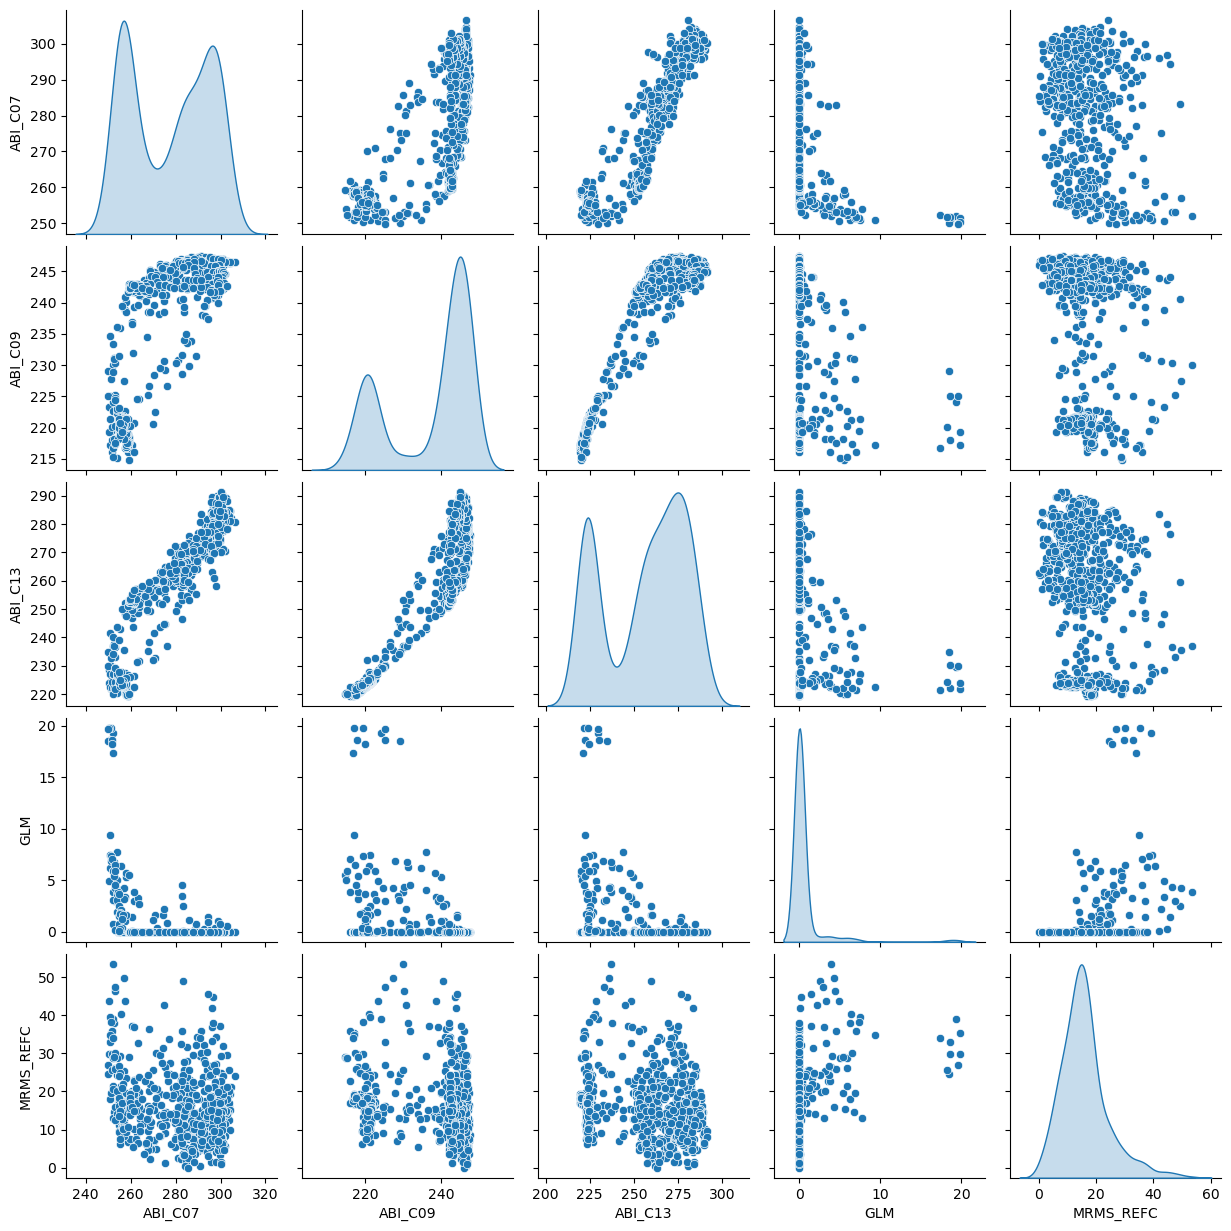

In [8]:
sns.pairplot(df_rnd_test.tail(700), diag_kind="kde")

In [9]:
train_col = ['ABI_C07', 'ABI_C09', 'ABI_C13', 'GLM'] # Try excluding various inputs from your exploration above
test_col =['MRMS_REFC']

In [10]:
X_train = df_rnd_train[train_col]
y_train = df_rnd_train[test_col]

X_test = df_rnd_test[train_col]
y_test = df_rnd_test[test_col]

X_val = df_rnd_val[train_col]
y_val = df_rnd_val[test_col]

# XGBoost

Docs are [here](https://xgboost.readthedocs.io/en/stable/) for XGBoost. 

In [11]:
XGBr = XGB.XGBRegressor(eval_metric='rmse')

XGBr.fit(
    X_train.values, 
    y_train)

# Test set
xgb_y_pred = XGBr.predict(X_test.values)
# Validation set
xgb_y_pred_val = XGBr.predict(X_val.values)

In [12]:
rmse_results(y_test.values, y_val.values, xgb_y_pred.ravel(), xgb_y_pred_val.ravel() )

test set RMSE: 75.93
val set RMSE: 79.62
difference: 3.7


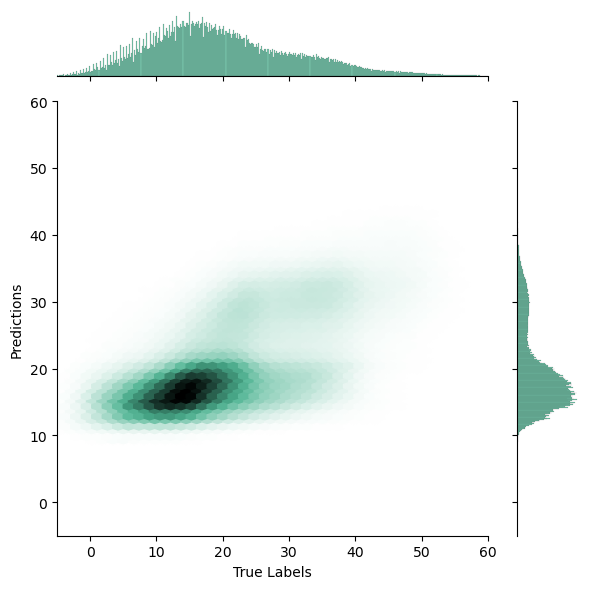

In [13]:
result_plot(
    y_test.values.ravel(),
    xgb_y_pred.ravel())

# KNN Regression

Docs are [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) for knn regression.

In [14]:
KNNr = KNeighborsRegressor(n_neighbors=11) # worth playing around with # of neighbors

KNNr.fit(
    X_train.values, 
    y_train)

knn_y_pred = KNNr.predict(X_test.values)

knn_y_pred_val = KNNr.predict(X_val.values)

In [15]:
rmse_results(y_test.values, y_val.values, knn_y_pred.ravel(), knn_y_pred_val.ravel())

test set RMSE: 83.33
val set RMSE: 87.44
difference: 4.1


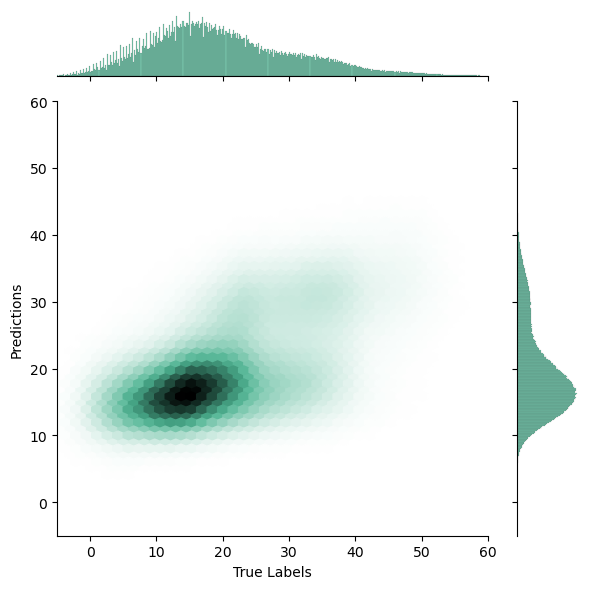

In [16]:
result_plot(
    y_test.values.ravel(),
    knn_y_pred.ravel())

# Linear Regression

Docs are [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for scikit-learn linear regression.

In [17]:
LR = LinearRegression()

In [18]:
LR.fit(
    X_train.values, 
    y_train)

LR_y_pred = LR.predict(X_test.values)

LR_y_pred_val = LR.predict(X_val.values)

In [19]:
rmse_results(y_test.values, y_val.values, LR_y_pred.ravel(), LR_y_pred_val.ravel())

test set RMSE: 98.14
val set RMSE: 99.29
difference: 1.2


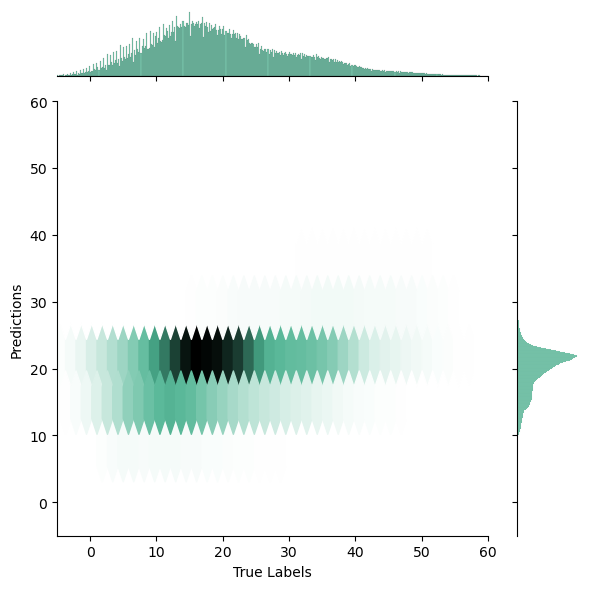

In [20]:
result_plot(
    y_test.values.ravel(),
    LR_y_pred.ravel())

# Further Work

Play around with some of the parameters! For further exploration into ML regression problems, check out this repo:

https://github.com/ThomasMGeo/regressor_compare
